# Feature Engineering

### Predict happiness on the Airline
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

##  Problem statement
Complete the analysis of what sorts of people were be satisfied with the airline.

# Dataset
Kaggle: https://www.kaggle.com/johndddddd/customer-satisfaction

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_excel('satisfaction_2015.xlsx').dropna()

## Data Dictionary:
    "satisfied": 1,
    "neutral or dissatisfied": 0,
    'Male': 0,
    'Female': 1,
    "Loyal Customer": 0,
    "disloyal Customer": 1,
    "Business travel":0,
    "Personal Travel":1,
    "Eco":0,
    "Eco Plus":1,
    "Business":2

In [2]:
data1 = df.iloc[:, :]
data_copy = data1

In [3]:
# to customize what value for each feature to be mapped to 
# we can provide a dictionary that has all the mapping rules


mydict = {
    "satisfied": 1,
    "neutral or dissatisfied": 0,
}

#we should only map certain rows (add in the above data it is 1,2,3,5,6)
for i in [1]:
    data_copy.iloc[:, i] = data_copy.iloc[:, i].map(mydict)

Printing first 10 rows of the train dataset.

In [4]:
data_copy.head(10)

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,1,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,1,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,1,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,1,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,1,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0
5,129488,0,Female,disloyal Customer,15,Personal Travel,Eco,2704,1,0,...,1,1,5,3,5,5,5,1,0,0.0
6,69507,0,Male,disloyal Customer,51,Personal Travel,Eco,1746,1,0,...,1,1,5,3,5,4,4,1,20,22.0
7,126309,0,Female,disloyal Customer,26,Personal Travel,Eco,650,1,1,...,2,2,2,5,2,1,3,2,0,0.0
8,123581,0,Female,disloyal Customer,37,Personal Travel,Eco,1773,1,1,...,2,2,2,5,3,3,3,2,5,4.0
9,24129,0,Female,disloyal Customer,65,Personal Travel,Eco,584,1,1,...,4,4,3,4,4,4,3,4,0,13.0


In [5]:
data_copy.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,117135,1,Male,disloyal Customer,56,Personal Travel,Eco,369,0,2,...,3,3,1,5,3,3,4,3,0,0.0
1,72091,1,Male,disloyal Customer,49,Personal Travel,Eco,2486,0,2,...,3,2,1,1,4,4,3,2,0,0.0
2,29663,1,Male,disloyal Customer,55,Personal Travel,Eco,1448,0,3,...,3,3,3,5,3,2,3,3,0,0.0
3,81849,1,Female,disloyal Customer,36,Personal Travel,Eco,1501,0,4,...,4,4,5,4,5,5,5,4,0,0.0
4,83693,1,Male,disloyal Customer,55,Personal Travel,Eco,577,0,5,...,3,3,3,4,5,3,4,3,0,0.0


We can see that all the values are non-nullable. Further cleansing of the data is not required.

### Import python lib for visualization

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Gender
- Customer Type
- Type of travel
- Class

In [7]:
def bar_chart(feature):
    satisfied = data_copy[data_copy['satisfaction_v2']==1][feature].value_counts()
    neutral_or_dissatisfied = data_copy[data_copy['satisfaction_v2']==0][feature].value_counts()
    df1 = pd.DataFrame([satisfied,neutral_or_dissatisfied])
    df1.index = ['satisfied','neutral or dissatisfied']
    df1.plot(kind='bar',stacked=True, figsize=(10,5))

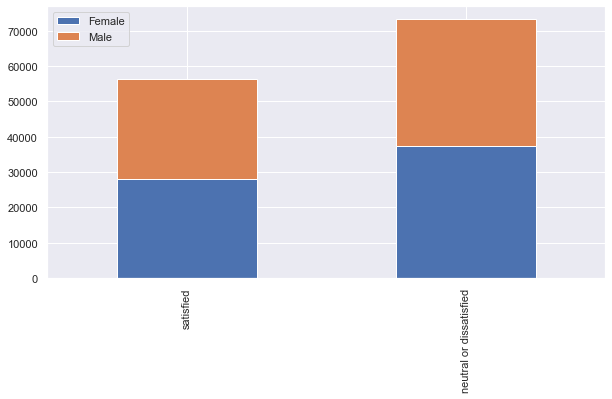

In [92]:
bar_chart('Gender')

The ratio from the gender remains approximately the same.

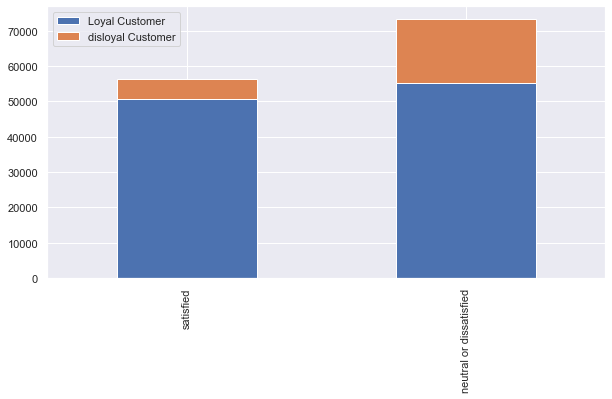

In [10]:
bar_chart('Customer Type')

The Chart confirms **loyal customers** more likely to be satisfied than **disloyal customers**.

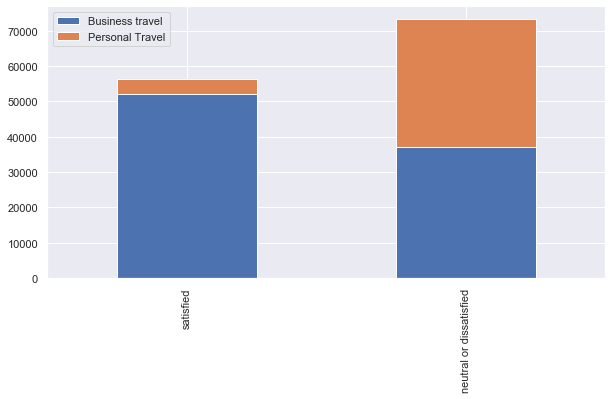

In [94]:
bar_chart('Type of Travel')

The Chart confirms **a person aboarded in Business Travel** more likely to be satisfied.

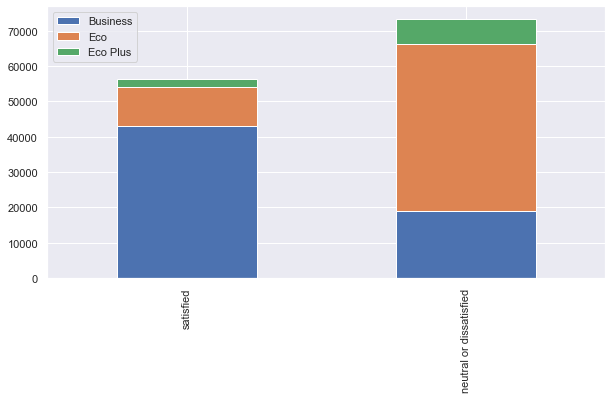

In [95]:
bar_chart('Class')

The Chart confirms **a person in Business class** slightly more likely to be satisfied.

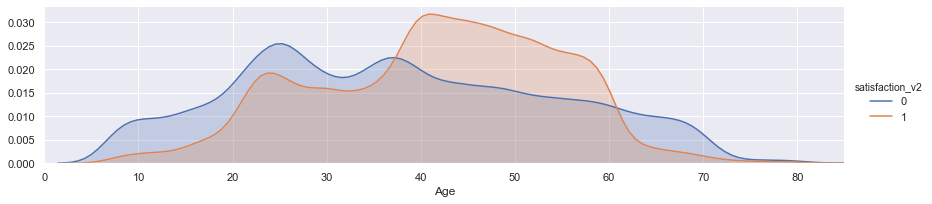

In [98]:
facet = sns.FacetGrid(data1, hue="satisfaction_v2",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, data1['Age'].max()))
facet.add_legend()
 
plt.show() 

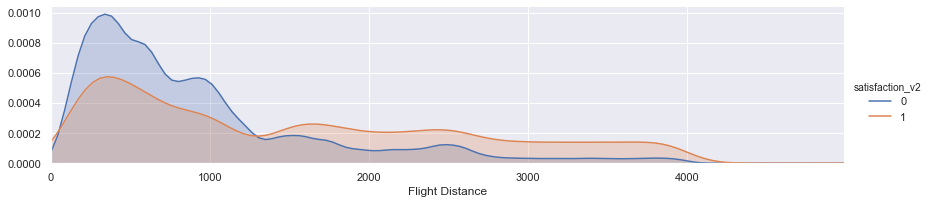

In [99]:
facet = sns.FacetGrid(data1, hue="satisfaction_v2",aspect=4)
facet.map(sns.kdeplot,'Flight Distance',shade= True)
facet.set(xlim=(0, data1['Flight Distance'].max()))
facet.add_legend()
 
plt.show() 

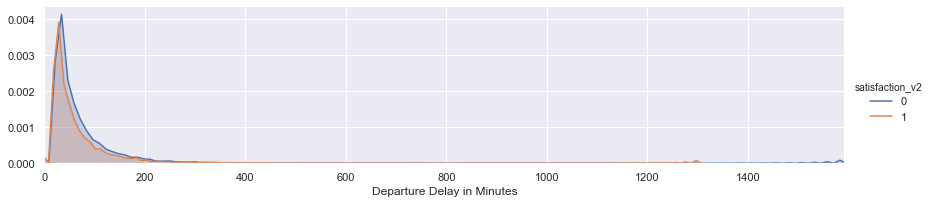

In [100]:
facet = sns.FacetGrid(data1, hue="satisfaction_v2",aspect=4)
facet.map(sns.kdeplot,'Departure Delay in Minutes',shade= True)
facet.set(xlim=(0, data1['Departure Delay in Minutes'].max()))
facet.add_legend()
 
plt.show() 

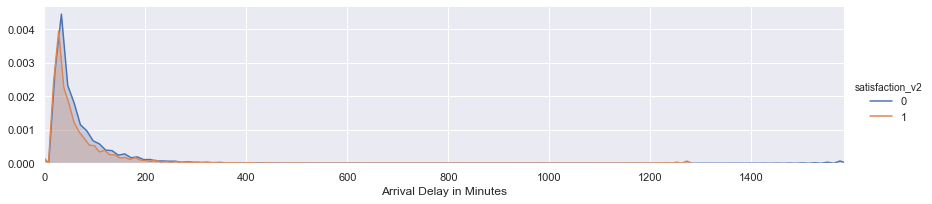

In [101]:
facet = sns.FacetGrid(data1, hue="satisfaction_v2",aspect=4)
facet.map(sns.kdeplot,'Arrival Delay in Minutes',shade= True)
facet.set(xlim=(0, data1['Arrival Delay in Minutes'].max()))
facet.add_legend()
 
plt.show() 

# Testing correlation

In [8]:
data_copy.describe(include='all')

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487,129487,129487.000000,129487,129487,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
unique,NaN,NaN,2,2,NaN,2,3,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,Loyal Customer,NaN,Business travel,Business,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,65703,105773,NaN,89445,61990,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,64958.335169,0.434499,NaN,NaN,39.428761,NaN,NaN,1190.210662,2.728544,3.057349,...,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,37489.781165,0.495693,NaN,NaN,15.117597,NaN,NaN,997.560954,1.329235,1.526787,...,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,1.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,31.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32494.500000,0.000000,NaN,NaN,27.000000,NaN,NaN,414.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64972.000000,0.000000,NaN,NaN,40.000000,NaN,NaN,844.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97415.500000,1.000000,NaN,NaN,51.000000,NaN,NaN,1744.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


In [9]:
# to customize what value for each feature to be mapped to 
# we can provide a dictionary that has all the mapping rules
TrainTestCorr = data_copy.drop(['id','Arrival Delay in Minutes'], axis=1)

mydict = {
    "Male": 0,
    "Female": 1,
    "Loyal Customer": 0,
    "disloyal Customer": 1,
    "Business travel":0,
    "Personal Travel":1,
    "Eco":0,
    "Eco Plus":1,
    "Business":2
}

#we should only map certain rows (add in the above data it is 1,2,3,5,6)
for i in [1,2,4,5]:
    TrainTestCorr.iloc[:, i] = TrainTestCorr.iloc[:, i].map(mydict)

#change the flight distance and the age
# make a copy of the dataframe
train_test_data_copy = TrainTestCorr
# categorize by their Age
train_test_data_copy.loc[df['Age']< 27, 'Age'] = 0
train_test_data_copy.loc[(df['Age'] >= 27) & (df['Age'] < 40), 'Age'] = 1
train_test_data_copy.loc[(df['Age'] >= 40) & (df['Age'] < 51), 'Age'] = 2
train_test_data_copy.loc[df['Age'] >= 51, 'Age'] = 3
# categorize by their Flight Distance
train_test_data_copy.loc[df['Flight Distance']< 414, 'Flight Distance'] = 0
train_test_data_copy.loc[(df['Flight Distance'] >= 414) & (df['Flight Distance'] < 844), 'Flight Distance'] = 1
train_test_data_copy.loc[(df['Flight Distance'] >= 844) & (df['Flight Distance'] < 1744), 'Flight Distance'] = 2
train_test_data_copy.loc[df['Flight Distance'] >= 1744, 'Flight Distance'] = 3
# categorize by their Departure Delay in Minutes
train_test_data_copy.loc[df['Departure Delay in Minutes']< 12, 'Departure Delay in Minutes'] = 0
train_test_data_copy.loc[df['Departure Delay in Minutes'] >= 12, 'Departure Delay in Minutes'] = 1

train_test_data_copy.head()

,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
0,1,0,1,3,1,0,0,0,2,0,...,0,3,3,1,5,3,3,4,3,0
1,1,0,1,2,1,0,3,0,2,1,...,1,3,2,1,1,4,4,3,2,0
2,1,0,1,3,1,0,2,0,3,0,...,0,3,3,3,5,3,2,3,3,0
3,1,1,1,1,1,0,2,0,4,0,...,0,4,4,5,4,5,5,5,4,0
4,1,0,1,3,1,0,1,0,5,0,...,5,3,3,3,4,5,3,4,3,0


In [18]:
from pandas.plotting import scatter_matrix
corr = train_test_data_copy.corr()
corr.style.background_gradient(cmap='coolwarm')



,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
satisfaction_v2,1,-0.0114961,-0.185925,0.155747,-0.449794,0.493066,0.247031,0.283291,-0.0544565,0.168704,-0.00292278,0.211164,0.50162,0.348576,0.398334,0.322329,0.312557,0.248651,0.237146,0.245027,0.306891,-0.070518
Gender,-0.0114961,1,0.0308035,-0.0106656,-0.00921503,-0.00573192,-0.00382812,-0.00596794,-0.00877217,-0.00612902,0.000859729,-0.00163074,0.0448501,0.0308473,-0.00379847,-0.00644144,-0.0310307,-0.0364138,-0.00839179,-0.0381762,-0.00281788,-0.00180288
Customer Type,-0.185925,0.0308035,1,-0.333704,-0.30821,-0.105603,-0.192143,-0.00588383,-0.206916,-0.018183,0.00464747,-0.057126,-0.189329,-0.156383,-0.106157,-0.0540399,-0.0468851,0.0250155,-0.0312584,0.023567,-0.0814329,0.00497715
Age,0.155747,-0.0106656,-0.333704,1,-0.0289785,0.152302,0.0851933,0.0175117,0.0487959,0.0233556,0.000581883,0.0276786,0.220892,0.173438,0.0886532,0.0704048,0.0554686,-0.0359848,0.0442224,-0.0390012,0.0630803,-0.00710634
Type of Travel,-0.449794,-0.00921503,-0.30821,-0.0289785,1,-0.545369,-0.214153,-0.105574,0.257208,-0.133891,-0.0298822,-0.0687276,-0.223781,-0.127404,-0.152708,-0.0596996,-0.13954,-0.0329209,0.0165304,-0.0234169,-0.0842574,-0.00668211
Class,0.493066,-0.00573192,-0.105603,0.152302,-0.545369,1,0.380945,0.0368005,-0.0900741,0.107489,0.0057694,0.0882442,0.322983,0.227308,0.196274,0.21095,0.206172,0.161377,0.151175,0.155507,0.138551,-0.00640756
Flight Distance,0.247031,-0.00382812,-0.192143,0.0851933,-0.214153,0.380945,1,0.00967433,-0.00189327,0.0666722,0.00333121,0.0470422,0.184891,0.13398,0.104571,0.0966763,0.116652,0.0577907,0.0703886,0.0559289,0.0817953,0.0058228
Inflight wifi service,0.283291,-0.00596794,-0.00588383,0.0175117,-0.105574,0.0368005,0.00967433,1,0.344846,0.714888,0.338547,0.132109,0.457422,0.121373,0.207887,0.120028,0.160414,0.120548,0.0438466,0.1103,0.131163,-0.0247203
Departure/Arrival time convenient,-0.0544565,-0.00877217,-0.206916,0.0487959,0.257208,-0.0900741,-0.00189327,0.344846,1,0.437697,0.447411,0.00105741,0.0721754,0.00870704,-0.00818934,0.0670457,0.0106339,0.0706458,0.0912169,0.0721657,0.0100212,-0.00453499
Ease of Online booking,0.168704,-0.00612902,-0.018183,0.0233556,-0.133891,0.107489,0.0666722,0.714888,0.437697,1,0.460155,0.0306379,0.404944,0.0286019,0.0466693,0.0390395,0.109341,0.0392146,0.00883548,0.0353559,0.0151499,-0.0073077


Departure delay in minutes is positively correlated to arrival delay in minutes.

In [10]:
train_test_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 22 columns):
satisfaction_v2                      129487 non-null int64
Gender                               129487 non-null int64
Customer Type                        129487 non-null int64
Age                                  129487 non-null int64
Type of Travel                       129487 non-null int64
Class                                129487 non-null int64
Flight Distance                      129487 non-null int64
Inflight wifi service                129487 non-null int64
Departure/Arrival time convenient    129487 non-null int64
Ease of Online booking               129487 non-null int64
Gate location                        129487 non-null int64
Food and drink                       129487 non-null int64
Online boarding                      129487 non-null int64
Seat comfort                         129487 non-null int64
Inflight entertainment               129487 non-null int64
On-b

In [11]:
train_test_data = train_test_data_copy.drop(['Gender', "Departure/Arrival time convenient","Gate location","Departure Delay in Minutes"], axis=1)
train_test_data.head()

,satisfaction_v2,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,1,3,1,0,0,0,0,3,0,3,3,1,5,3,3,4,3
1,1,1,2,1,0,3,0,1,2,1,3,2,1,1,4,4,3,2
2,1,1,3,1,0,2,0,0,3,0,3,3,3,5,3,2,3,3
3,1,1,1,1,0,2,0,0,4,0,4,4,5,4,5,5,5,4
4,1,1,3,1,0,1,0,0,3,5,3,3,3,4,5,3,4,3


## 4.1 Accuracy Test

In [110]:
def bar_chart_after_clean(feature):
    satisfied = train_test_data[train_test_data['satisfaction_v2']==1][feature].value_counts()
    neutral_or_dissatisfied = train_test_data[train_test_data['satisfaction_v2']==0][feature].value_counts()
    df = pd.DataFrame([satisfied,neutral_or_dissatisfied])
    df.index = ['satisfied','neutral or dissatisfied']
    print(df)
    df.plot(kind='bar',stacked=True, figsize=(10,5))

In [111]:
train_test_data.head()

,satisfaction_v2,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,1,3,1,0,0,0,0,3,0,3,3,1,5,3,3,4,3
1,1,1,2,1,0,3,0,1,2,1,3,2,1,1,4,4,3,2
2,1,1,3,1,0,2,0,0,3,0,3,3,3,5,3,2,3,3
3,1,1,1,1,0,2,0,0,4,0,4,4,5,4,5,5,5,4
4,1,1,3,1,0,1,0,0,3,5,3,3,3,4,5,3,4,3


                             0      1      2      3
satisfied                 8887  13241  18587  15547
neutral or dissatisfied  22010  19724  13539  17952


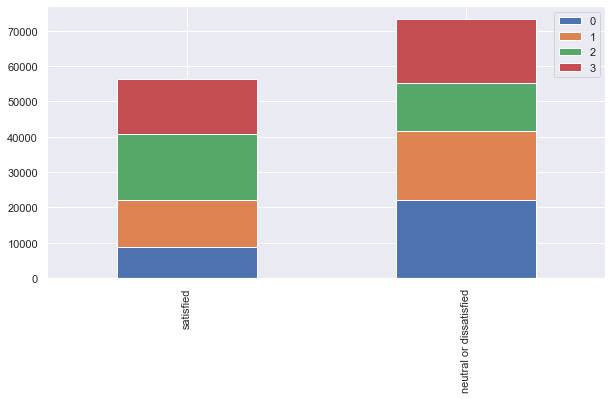

In [112]:
bar_chart_after_clean('Age')

## 5. Modelling

In [12]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [13]:
train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 18 columns):
satisfaction_v2           129487 non-null int64
Customer Type             129487 non-null int64
Age                       129487 non-null int64
Type of Travel            129487 non-null int64
Class                     129487 non-null int64
Flight Distance           129487 non-null int64
Inflight wifi service     129487 non-null int64
Ease of Online booking    129487 non-null int64
Food and drink            129487 non-null int64
Online boarding           129487 non-null int64
Seat comfort              129487 non-null int64
Inflight entertainment    129487 non-null int64
On-board service          129487 non-null int64
Leg room service          129487 non-null int64
Baggage handling          129487 non-null int64
Checkin service           129487 non-null int64
Inflight service          129487 non-null int64
Cleanliness               129487 non-null int64
dtypes: int64(18)
memory 

In [21]:
X_train, X_test, y_train, y_test = train_test_split(train_test_data.iloc[:,:], train_test_data['satisfaction_v2'], random_state = 42)
X_train_data = X_train.drop('satisfaction_v2', axis=1)
X_test_data = X_test.drop('satisfaction_v2', axis=1)
target = X_train['satisfaction_v2']

X_train_data.shape, target.shape

((97115, 17), (97115,))

In [17]:
target.shape

(97115,)

In [23]:
X_train.head

<bound method NDFrame.head of         satisfaction_v2  Customer Type  Age  Type of Travel  Class  \
64483                 1              0    1               0      2   
94325                 1              0    0               0      2   
27255                 0              0    0               1      0   
49100                 0              1    0               0      0   
105296                0              0    3               0      2   
17341                 0              0    0               1      2   
58132                 0              1    3               0      2   
69588                 0              0    0               0      2   
35196                 0              0    0               1      0   
71537                 1              0    3               0      2   
104781                1              0    2               0      2   
103139                1              0    2               0      2   
85563                 0              0    2               0 

In [19]:
y_train.shape

(97115,)

In [25]:
y_train.head

<bound method NDFrame.head of 64483     1
94325     1
27255     0
49100     0
105296    0
17341     0
58132     0
69588     0
35196     0
71537     1
104781    1
103139    1
85563     0
76657     0
55380     0
129715    1
72627     0
45470     0
71041     1
47374     0
22745     0
58436     0
122396    1
119925    1
77296     0
81091     0
107549    1
106489    1
112569    1
69190     0
         ..
103673    1
5340      0
68186     0
122008    1
65136     1
63164     1
59934     0
773       1
65031     1
67437     0
41235     0
16093     0
60465     0
44285     0
126708    1
113068    1
87769     0
37327     0
128606    1
82639     0
6297      0
55072     0
77061     0
110601    1
120247    1
128498    1
104014    1
864       1
15861     0
122330    1
Name: satisfaction_v2, Length: 97115, dtype: int64>

### 6.2 Cross Validation (K-fold)

In [34]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 6.2.1 kNN

In [120]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.92689456 0.92854201 0.92751236 0.93255766 0.93554366 0.92699001
 0.93028524 0.93069715 0.92565132 0.93038822]


In [121]:
# kNN Score
round(np.mean(score)*100, 2)

92.95

Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logReg = LogisticRegression(solver = 'lbfgs')
logReg.fit(X_train_data, target)
y_pred=logReg.predict(X_test_data)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8706907203756332

### 6.2.2 Decision Tree

In [122]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.93914745 0.93883855 0.94182455 0.94470758 0.94429572 0.94295129
 0.94192153 0.9416126  0.944187   0.94171558]


In [123]:
# decision tree Score
round(np.mean(score)*100, 2)

94.21

### 6.2.3 Random Forest

In [124]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, X_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.95531301 0.95665157 0.95675453 0.95901977 0.96056425 0.95932448
 0.95839769 0.95726496 0.95736793 0.95747091]


In [125]:
# Random Forest Score
round(np.mean(score)*100, 2)

95.78

### 6.2.4 Naive Bayes

In [126]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X_train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.86871911 0.86810132 0.86758649 0.86974876 0.87067545 0.87097106
 0.87292761 0.86839666 0.86551334 0.87498713]


In [127]:
# Naive Bayes Score
round(np.mean(score)*100, 2)

86.98

### 6.2.5 SVM

In [35]:
clf = SVC(gamma='scale')
scoring = 'accuracy'
score = cross_val_score(clf, X_train_data, target, cv=k_fold, n_jobs=5, scoring=scoring)
print(score)

[0.9425453  0.94759061 0.94388386 0.94697282 0.94841433 0.94367212
 0.94923283 0.94398105 0.94480486 0.94799712]


In [36]:
round(np.mean(score)*100,2)

94.59

## 7. Testing

In [ ]:
clf = SVC(gamma='scale')
clf.fit(train_data, target)

prediction = clf.predict(y_test)

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)

In [ ]:
submission = pd.read_csv('submission.csv')
submission.head()

## References

This notebook is modified based on 
https://github.com/minsuk-heo/kaggle-titanic 

which in created based on the following:
- [Mukesh ChapagainTitanic Solution: A Beginner's Guide](https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide?scriptVersionId=1473689)
- [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)
- [Titanic: factors to survive](https://olegleyz.github.io/titanic_factors.html)
- [Titanic Survivors Dataset and Data Wrangling](http://www.codeastar.com/data-wrangling/)
